# Excercise: Eigen Face

Here, we will look into ability of PCA to perform dimensionality reduction on a set of Labeled Faces in the Wild dataset made available from scikit-learn. Our images will be of shape (62, 47). This problem is also famously known as the eigenface problem. Mathematically, we would like to find the principal components (or eigenvectors) of the covariance matrix of the set of face images. These eigenvectors are essentially a set of orthonormal features depicts the amount of variation between face images. When plotted, these eigenvectors are called eigenfaces.

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from time import time

import seaborn as sns; sns.set()

#### Setup data

In [2]:
faces = fetch_lfw_people(min_faces_per_person=8,download_if_missing=True)
X = faces.data
y = faces.target

print(faces.target_names)
print(faces.images.shape)

['Abdullah Gul' 'Adrien Brody' 'Al Gore' 'Alejandro Toledo' 'Ali Naimi'
 'Alvaro Uribe' 'Amelie Mauresmo' 'Ana Palacio' 'Andre Agassi'
 'Andy Roddick' 'Angelina Jolie' 'Ann Veneman' 'Anna Kournikova'
 'Antonio Palocci' 'Ari Fleischer' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Bill Frist' 'Bill Gates'
 'Bill Graham' 'Bill McBride' 'Bill Simon' 'Bob Hope' 'Britney Spears'
 'Carlos Menem' 'Carlos Moya' 'Catherine Zeta-Jones' 'Celine Dion'
 'Cesar Gaviria' 'Charles Moose' 'Charles Taylor' 'Colin Farrell'
 'Colin Powell' 'Condoleezza Rice' 'David Beckham' 'David Nalbandian'
 'Dick Cheney' 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fernando Gonzalez' 'Fernando Henrique Cardoso'
 'Fidel Castro' 'George Clooney' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gerry Adams'
 'Gloria Macapagal Arroyo' 'Gonzalo Sanchez de Lozada' 'Gordon Brown'
 'Gray Davis' 'Guillermo Coria' 'Halle Berry' 'Hamid Kar

Since our images is of the shape (62, 47), we unroll each image into a single row vector of shape (1, 2914). This means that we have 2914 features defining each image. These 2914 features will result into 2914 principal components in the PCA projection space. Therefore, each image location contributes more or less to each principal component.

#### Implement Eigen Faces

# Adding noise to images

We now add gaussian noise to the images. Will PCA be able to effectively perform dimensionality reduction? 

In [46]:
def CreateCovarianceMatrix(dataset):
    
    mean = np.mean(dataset,axis=0)
    mean = mean.reshape(1,-1)

    temp = (dataset-mean)
    constant = 1/(dataset.shape)[0]
    
    covarianceMatrix = constant * np.dot(temp.T, temp)
    covarianceMatrix = np.array(covarianceMatrix, dtype=float)

    return covarianceMatrix

In [47]:
def FindOptimalFeatures(dataset):
    
    covarianceMatrix = CreateCovarianceMatrix(dataset)
    
    eigenvalues, eigenvectors = np.linalg.eig(covarianceMatrix)
    maxVariance = np.sum(eigenvalues)
    
    variance = 0
    principalComponents = -1
    
    for index, eigenvalue in enumerate(eigenvalues):
        variance += eigenvalue
        if(variance > 0.95 * maxVariance):
            principalComponents = index+1
            break
            
    return principalComponents

In [48]:
def ApplyPCA(principalComponents,dataset):
    
    pca = PCA(n_components=principalComponents, svd_solver='randomized',whiten=True).fit(dataset)
    
    eigenfaces = pca.components_.reshape((principalComponents, 62, 47))
    Compressed = pca.transform(dataset)
    Reconstructed = pca.inverse_transform(Compressed)
    
    return Compressed, Reconstructed

In [49]:
def PlotImages(images):
    fig, axes = plt.subplots(2, 10, figsize=(10, 2.5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
      ax.imshow(images[i].reshape(62, 47), cmap='binary_r')

Below we plot first twenty noisy input face images.

Optimal features ,i.e, captures 95% variance 178
Original
PCA with all features
PCA with optimal features
PCA with 100 features


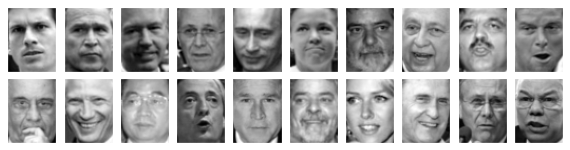

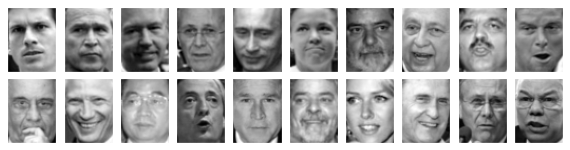

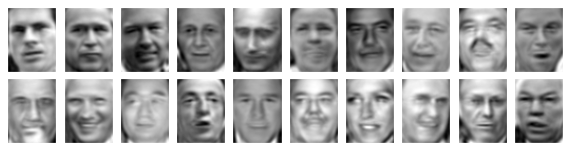

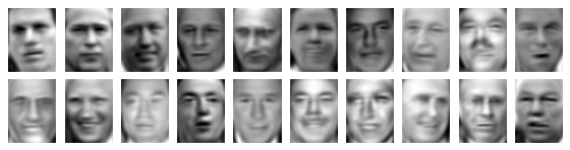

In [50]:
print("Optimal features ,i.e, captures 95% variance",FindOptimalFeatures(X))

print("Original")
PlotImages(X)

print("PCA with all features")
XCompressed, XReconstructed = ApplyPCA(2914,X)
PlotImages(XReconstructed)

print("PCA with optimal features")
XCompressed, XReconstructed = ApplyPCA(FindOptimalFeatures(X),X)
PlotImages(XReconstructed)

print("PCA with 100 features")
XCompressed, XReconstructed = ApplyPCA(100,X)
PlotImages(XReconstructed)

Optimal features ,i.e, captures 95% variance 1014
Original
PCA with all features
PCA with optimal features
PCA with 100 features


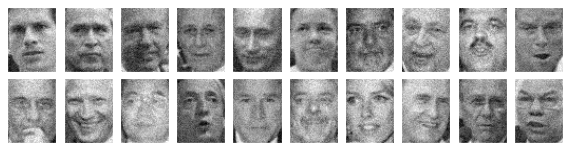

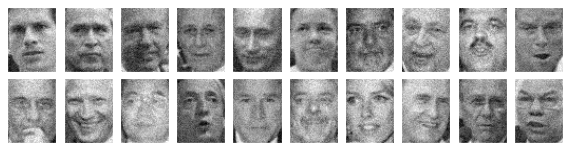

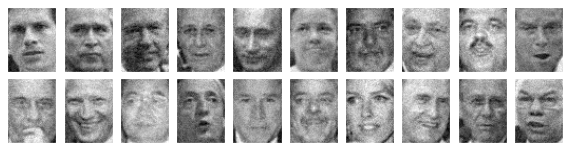

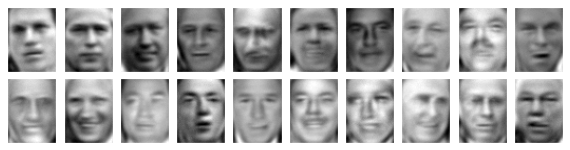

In [51]:
np.random.seed(42)

noisyFaces = np.random.normal(X, 15)
print("Optimal features ,i.e, captures 95% variance",FindOptimalFeatures(noisyFaces))

print("Original")
PlotImages(noisyFaces)

print("PCA with all features")
Compressed, Reconstructed = ApplyPCA(2914,noisyFaces)
PlotImages(Reconstructed)

print("PCA with optimal features")
Compressed, Reconstructed = ApplyPCA(FindOptimalFeatures(noisyFaces),noisyFaces)
PlotImages(Reconstructed)

print("PCA with 100 features")
Compressed, Reconstructed = ApplyPCA(100,noisyFaces)
PlotImages(Reconstructed)